In [9]:
import sys 
import dimod
import time
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import pandas as pd
import itertools
from itertools import permutations 
import operator
from operator import itemgetter
from sys import maxsize
import string
%matplotlib inline


In [12]:
def coloredges_txt(txtgraph, txtgraphsolution):
    nodelist = []
    edgelist = []
    alledges = []
    edge_colors = []
    new_edge_colors = []
    updated_colors = []
    edgedict = {}
    
    sourcegraph_matrix = np.loadtxt(txtgraph, dtype=int)
    sourcegraph = nx.to_networkx_graph(sourcegraph_matrix)
    targetgraph_adjacency = np.loadtxt(txtgraphsolution, dtype=float) 
    targetgraph_matrix = np.zeros((len(targetgraph_adjacency), len(targetgraph_adjacency)))
    for i in range(len(targetgraph_adjacency)):
        for j in range(len(targetgraph_adjacency)):
            if targetgraph_adjacency[i][j] == 1:
                targetgraph_matrix[i][j] = sourcegraph_matrix[i][j]
    targetgraph = nx.to_networkx_graph(targetgraph_matrix)
    
    Gi = nx.Graph()
    for i in range(len(targetgraph)):
        nodelist.append(i)
        for j in range(len(targetgraph)):
            if i != j:
                alledges.append((i,j))
                Gi.add_edge(i,j)
                edge_colors.append('blue')
                if targetgraph_adjacency[i][j] == 1:
                    edgelist.append((i,j))


    for i in range(len(alledges)):
        edgedict[alledges[i]] = edge_colors[i] 
        
    
    
    for edge1 in alledges:
        for edge2 in edgelist:
            if edge2 == edge1:
                edgedict[edge1] = 'red'
        new_edge_colors.append(edgedict[edge1])
    print(Gi.edges)
    print(edgedict)
    
    for i in Gi.edges:
        for edge in alledges:
            if i == edge:
                updated_colors.append(edgedict[edge])


    return nx.draw(Gi, edge_color=updated_colors, width=5, with_labels = True)
    


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]
{(0, 1): 'blue', (0, 2): 'red', (0, 3): 'blue', (0, 4): 'blue', (0, 5): 'blue', (0, 6): 'blue', (0, 7): 'red', (1, 0): 'blue', (1, 2): 'blue', (1, 3): 'red', (1, 4): 'blue', (1, 5): 'red', (1, 6): 'blue', (1, 7): 'blue', (2, 0): 'red', (2, 1): 'blue', (2, 3): 'blue', (2, 4): 'red', (2, 5): 'blue', (2, 6): 'blue', (2, 7): 'blue', (3, 0): 'blue', (3, 1): 'red', (3, 2): 'blue', (3, 4): 'red', (3, 5): 'blue', (3, 6): 'blue', (3, 7): 'blue', (4, 0): 'blue', (4, 1): 'blue', (4, 2): 'red', (4, 3): 'red', (4, 5): 'blue', (4, 6): 'blue', (4, 7): 'blue', (5, 0): 'blue', (5, 1): 'red', (5, 2): 'blue', (5, 3): 'blue', (5, 4): 'blue', (5, 6): 'red', (5, 7): 'blue', (6, 0): 'blue', (6, 1): 'blue', (6, 2): 'blue', (6, 3): 'blue', (6, 4): 'blue', (6, 5): 'red', (6, 7): 'red', (7, 

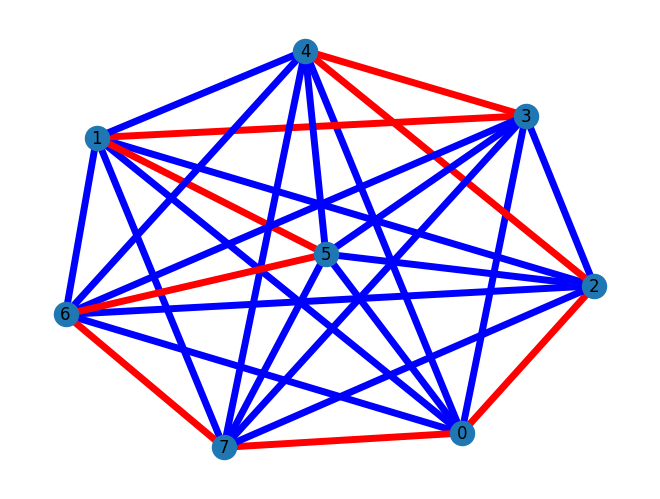

In [13]:
coloredges_txt("graph.txt", "graphsolution.txt")

In [20]:
def coloredges__npy(txtgraph, txtgraphsolution):
    nodelist = []
    edgelist = []
    alledges = []
    edge_colors = []
    new_edge_colors = []
    updated_colors = []
    edgedict = {}
    
    sourcegraph_matrix = np.load(txtgraph)
    sourcegraph = nx.to_networkx_graph(sourcegraph_matrix)
    targetgraph_adjacency_npy = np.load(npygraphsolution, allow_pickle=True) 
    targetgraph_adjacency= np.array(targetgraph_adjacency_npy.tolist().todense() + np.transpose(targetgraph_adjacency_npy.tolist().todense()))
    targetgraph_matrix = np.zeros((len(targetgraph_adjacency), len(targetgraph_adjacency)))
    for i in range(len(targetgraph_adjacency)):
        for j in range(len(targetgraph_adjacency)):
            if targetgraph_adjacency[i][j] == 1:
                targetgraph_matrix[i][j] = sourcegraph_matrix[i][j]
    targetgraph = nx.to_networkx_graph(targetgraph_matrix)
    
    Gi = nx.Graph()
    for i in range(len(targetgraph)):
        nodelist.append(i)
        for j in range(len(targetgraph)):
            if i != j:
                alledges.append((i,j))
                Gi.add_edge(i,j)
                edge_colors.append('blue')
                if targetgraph_adjacency[i][j] == 1:
                    edgelist.append((i,j))


    for i in range(len(alledges)):
        edgedict[alledges[i]] = edge_colors[i] 
        
    
    
    for edge1 in alledges:
        for edge2 in edgelist:
            if edge2 == edge1:
                edgedict[edge1] = 'red'
        new_edge_colors.append(edgedict[edge1])
    
    for i in Gi.edges:
        for edge in alledges:
            if i == edge:
                updated_colors.append(edgedict[edge])

    pos = nx.spring_layout(Gi, seed = 100)
    nx.draw(Gi, pos)
    return nx.draw(Gi, pos, edge_color=updated_colors, with_labels = True) 
    


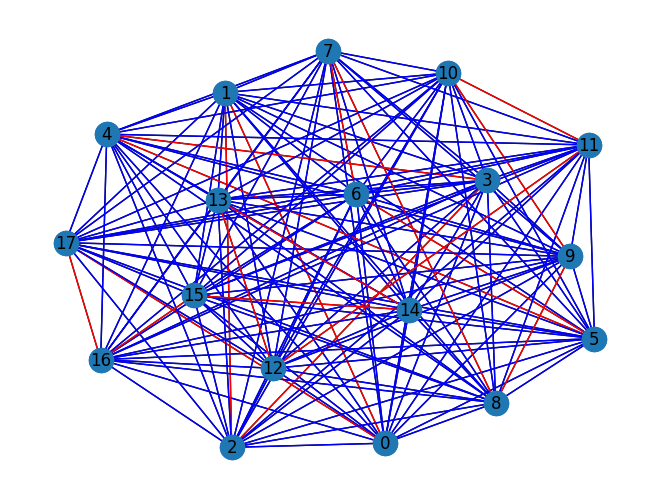

In [21]:
a = 'tsp_distances_18.npy'
asoln = 'tsp18_route_row3.npy'
coloredges__npy(a, asoln)
